<a href="https://colab.research.google.com/github/mianshariq/Datasets/blob/main/Data624_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import IPython.display as display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,make_scorer
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import GridSearchCV



pd.set_option('display.max_columns', None)

Loading the file from GitHub Repository and doing a quick summary of all the data

In [ ]:
# Load datasets
bev = pd.read_csv("https://github.com/mianshariq/Datasets/raw/f6e953c20c84fab6de88447a20dbe00c5f13c20e/StudentData.csv")
bev_eval = pd.read_csv("https://github.com/mianshariq/Datasets/raw/f6e953c20c84fab6de88447a20dbe00c5f13c20e/StudentEvaluation.csv")
bev.describe()

,Carb Volume,Fill Ounces,PC Volume,Carb Pressure,Carb Temp,PSC,PSC Fill,PSC CO2,Mnf Flow,Carb Pressure1,Fill Pressure,Hyd Pressure1,Hyd Pressure2,Hyd Pressure3,Hyd Pressure4,Filler Level,Filler Speed,Temperature,Usage cont,Carb Flow,Density,MFR,Balling,Pressure Vacuum,PH,Oxygen Filler,Bowl Setpoint,Pressure Setpoint,Air Pressurer,Alch Rel,Carb Rel,Balling Lvl
count,2561.000000,2533.000000,2532.000000,2544.000000,2545.000000,2538.000000,2548.000000,2532.000000,2569.000000,2539.000000,2549.000000,2560.000000,2556.000000,2556.000000,2541.000000,2551.000000,2514.000000,2557.000000,2566.000000,2569.000000,2570.000000,2359.000000,2570.000000,2571.000000,2567.000000,2559.000000,2569.000000,2559.000000,2571.000000,2562.000000,2561.000000,2570.000000
mean,5.370198,23.974755,0.277119,68.189575,141.094923,0.084574,0.195369,0.056414,24.568937,122.586373,47.922166,12.437578,20.961033,20.458451,96.288863,109.252372,3687.198886,65.967540,20.992962,2468.354223,1.173650,704.049258,2.197770,-5.216103,8.545649,0.046843,109.326586,47.615397,142.833995,6.897416,5.436783,2.050008
std,0.106385,0.087530,0.060695,3.538204,4.037386,0.049269,0.117782,0.043039,119.481126,4.742882,3.177546,12.433254,16.386307,15.975724,13.122559,15.698424,770.820021,1.382778,2.977936,1073.696474,0.377527,73.898309,0.931091,0.569993,0.172516,0.046644,15.303154,2.039047,1.211917,0.505275,0.128718,0.870309
min,5.040000,23.633333,0.079333,57.000000,128.600000,0.002000,0.000000,0.000000,-100.200000,105.600000,34.600000,-0.800000,0.000000,-1.200000,52.000000,55.800000,998.000000,63.600000,12.080000,26.000000,0.240000,31.400000,-0.170000,-6.600000,7.880000,0.002400,70.000000,44.000000,140.800000,5.280000,4.960000,0.000000
25%,5.293333,23.920000,0.239167,65.600000,138.400000,0.048000,0.100000,0.020000,-100.000000,119.000000,46.000000,0.000000,0.000000,0.000000,86.000000,98.300000,3888.000000,65.200000,18.360000,1144.000000,0.900000,706.300000,1.496000,-5.600000,8.440000,0.022000,100.000000,46.000000,142.200000,6.540000,5.340000,1.380000
50%,5.346667,23.973333,0.271333,68.200000,140.800000,0.076000,0.180000,0.040000,65.200000,123.200000,46.400000,11.400000,28.600000,27.600000,96.000000,118.400000,3982.000000,65.600000,21.790000,3028.000000,0.980000,724.000000,1.648000,-5.400000,8.540000,0.033400,120.000000,46.000000,142.600000,6.560000,5.400000,1.480000
75%,5.453333,24.026667,0.312000,70.600000,143.800000,0.112000,0.260000,0.080000,140.800000,125.400000,50.000000,20.200000,34.600000,33.400000,102.000000,120.000000,3998.000000,66.400000,23.755000,3186.000000,1.620000,731.000000,3.292000,-5.000000,8.680000,0.060000,120.000000,50.000000,143.000000,7.240000,5.540000,3.140000
max,5.700000,24.320000,0.478000,79.400000,154.000000,0.270000,0.620000,0.240000,229.400000,140.200000,60.400000,58.000000,59.400000,50.000000,142.000000,161.200000,4030.000000,76.200000,25.900000,5104.000000,1.920000,868.600000,4.012000,-3.600000,9.360000,0.400000,140.000000,52.000000,148.200000,8.620000,6.060000,3.660000


Creating a map of all the N/A's in the Data in order to handle nulls by imputation.

<Axes: >

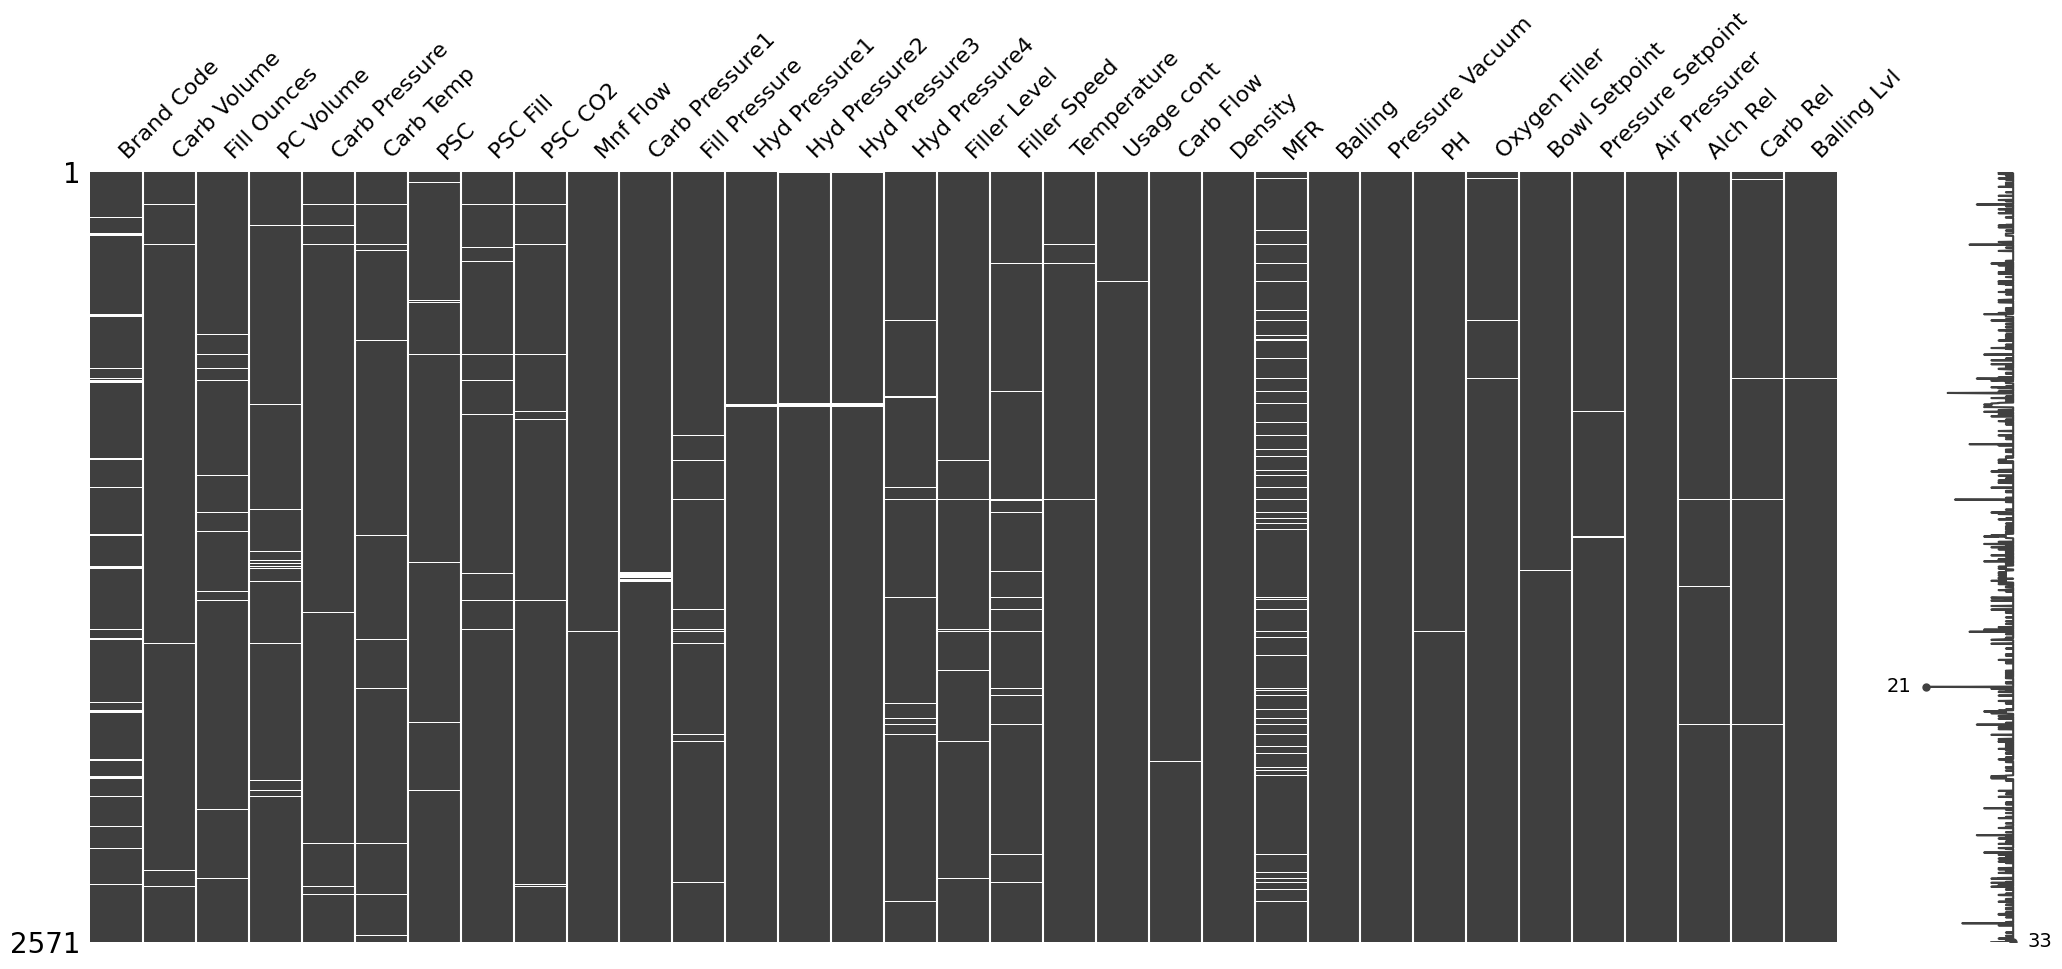

In [ ]:
msno.matrix(bev)


array([[<Axes: title={'center': 'Carb Volume'}>,
        <Axes: title={'center': 'Fill Ounces'}>,
        <Axes: title={'center': 'PC Volume'}>,
        <Axes: title={'center': 'Carb Pressure'}>,
        <Axes: title={'center': 'Carb Temp'}>,
        <Axes: title={'center': 'PSC'}>],
       [<Axes: title={'center': 'PSC Fill'}>,
        <Axes: title={'center': 'PSC CO2'}>,
        <Axes: title={'center': 'Mnf Flow'}>,
        <Axes: title={'center': 'Carb Pressure1'}>,
        <Axes: title={'center': 'Fill Pressure'}>,
        <Axes: title={'center': 'Hyd Pressure1'}>],
       [<Axes: title={'center': 'Hyd Pressure2'}>,
        <Axes: title={'center': 'Hyd Pressure3'}>,
        <Axes: title={'center': 'Hyd Pressure4'}>,
        <Axes: title={'center': 'Filler Level'}>,
        <Axes: title={'center': 'Filler Speed'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Usage cont'}>,
        <Axes: title={'center': 'Carb Flow'}>,
        <Axes: title={'ce

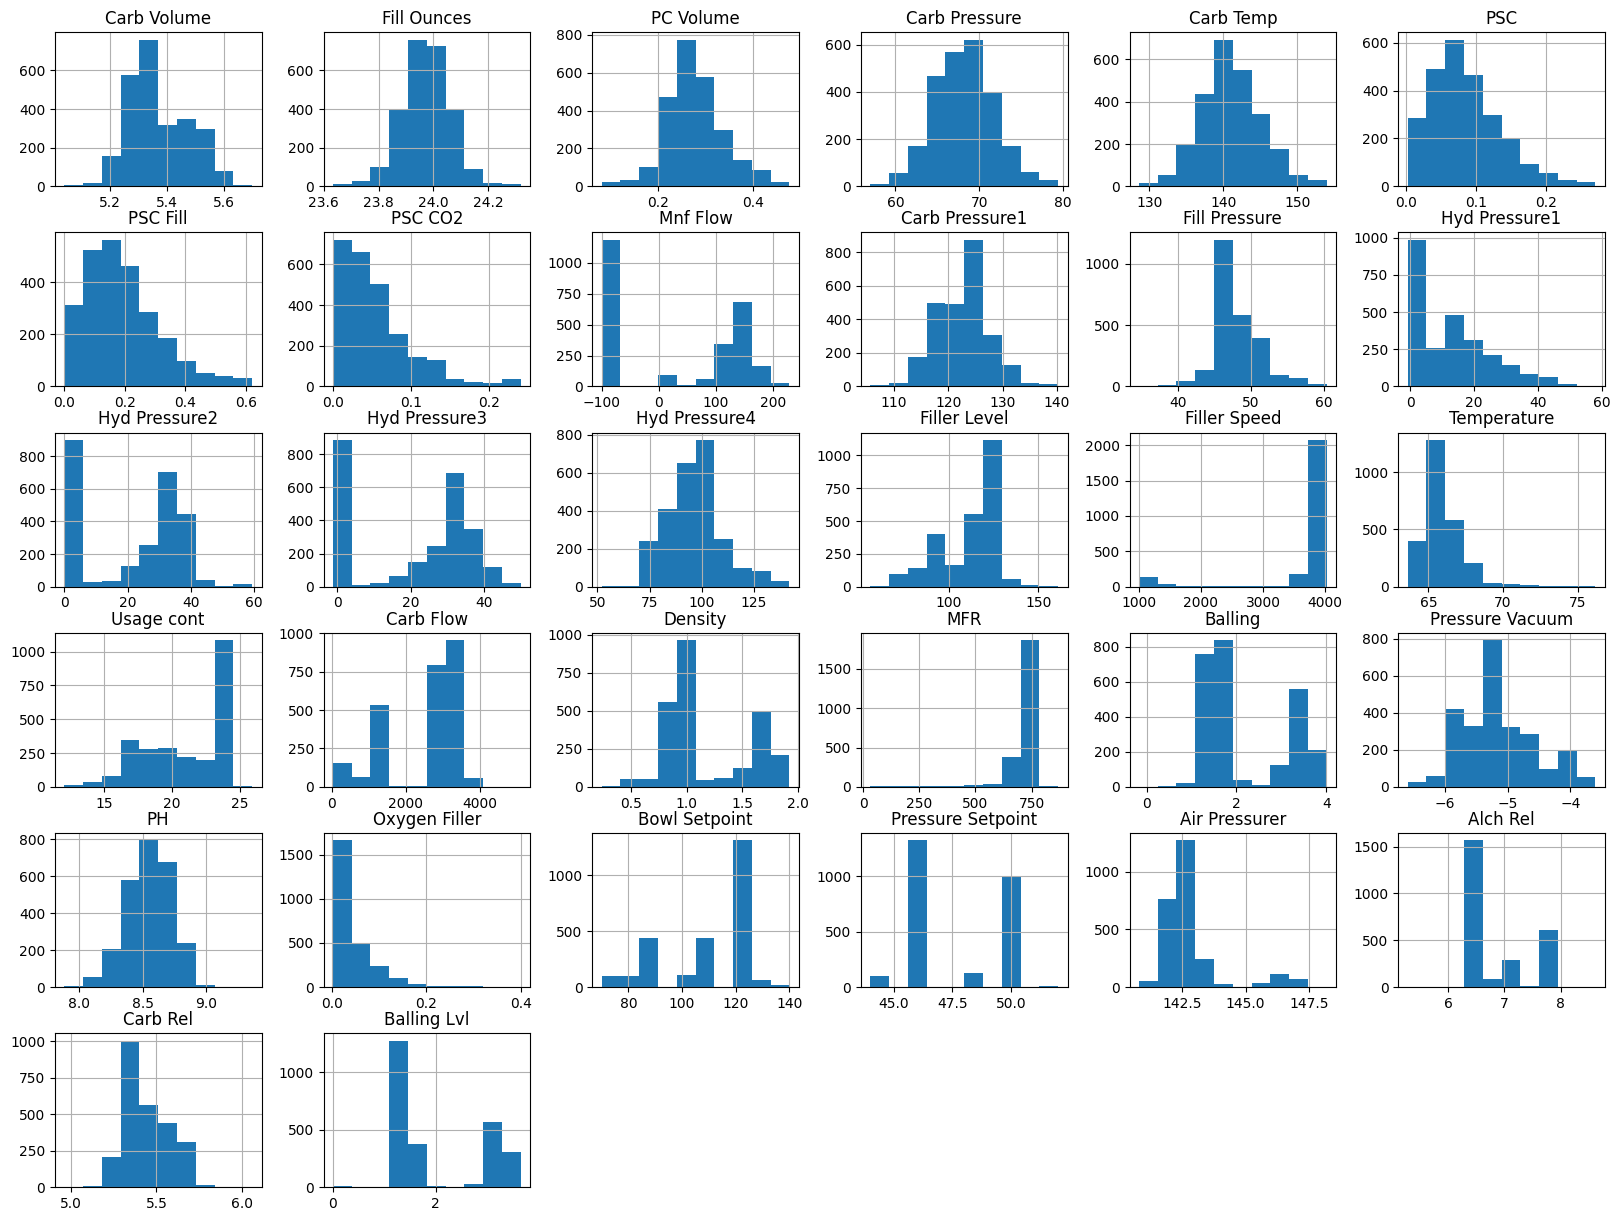

In [ ]:
bev.hist(figsize=(20, 15))

After Viewing the Nulls and Histogram, we want to create a Flag for MFR where its Nulls, as it would be wise to drop the columns as ~8% of the data is Null. We also have a column Mnf Flow which has a significant amount of Negative Values so we create another featured engineer cloumn which is wheter the value is negative or positive.

In [ ]:
bev['MFR_Flag'] = bev['MFR'].isnull().astype(int)
bev['Mnf_Flag'] = (bev['Mnf Flow']<=0).astype(int)


In [ ]:
bev_eval['MFR_Flag'] = bev_eval['MFR'].isnull().astype(int)
bev_eval['Mnf_Flag'] = (bev_eval['Mnf Flow']<=0).astype(int)

MFR is a column we might want to drop as it is highly correlated wuth Filler Speed but we are capturing it categorically via our MFR Flag. More info in next cell.

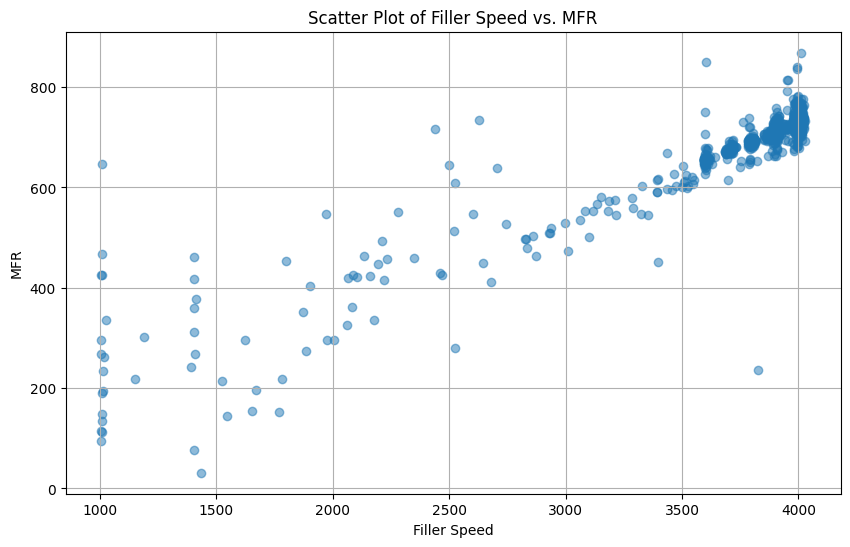

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(bev['Filler Speed'], bev['MFR'], alpha=0.5)
plt.title('Scatter Plot of Filler Speed vs. MFR')
plt.xlabel('Filler Speed')
plt.ylabel('MFR')
plt.grid(True)
plt.show()


Below we are Dropping 4 Values with missing PH value since this is our target variable. We are also removing one value where PH is 9.36 which is >3 standard deviation of our PH column. We are also dropping MFR column however we are capturing it categorically via our MFR Flag. This is based on the hypothesis that missing data may have soem correlation with PH levels. (System Malfunction/Shutdown)

In [ ]:
bev.dropna(subset=["PH"], inplace=True)
bev["PH"] = bev.pop("PH")
bev=bev[bev['PH']< 9.3]

bev.drop(columns=['MFR',
                  ], inplace=True)

bev_eval.drop(columns='PH', inplace=True)

<ipython-input-231-e6c8b89d4856>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev.drop(columns=['MFR',


Since the remaining column has missing data <4% of the each feature, we can use MICE laibrary for imputation. I'm only using MICE for all the numerical variables and then using Random Forest to predict missing values for Brand Code
MICE uses Random Forest to predict the missing values for each column, instead of imoputing mean/median/mode.

Also since Brand Code column is essentially categorrical column, twe need to one hot encode them into numerical values for our models as it wornt accept categorical values.

In [ ]:
# Select non-object columns
numeric_cols = bev_eval.select_dtypes(exclude=['object']).columns

# Apply MICE to non-object columns
imputer = IterativeImputer( max_iter=10, random_state=0)
imputed_values = imputer.fit_transform(bev_eval[numeric_cols])

# Replace missing values in the original DataFrame
for i, col in enumerate(numeric_cols):
    bev_eval[col] = imputed_values[:, i]

numeric_cols = bev.select_dtypes(exclude=['object']).columns

# Apply MICE to non-object columns
imputer = IterativeImputer(max_iter=10, random_state=0)
bev[numeric_cols] = imputer.fit_transform(bev[numeric_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Here I am using Random Forest to predict missing values for Brand_Code.

In [ ]:
label_encoder = LabelEncoder()
bev["Brand Code"] = label_encoder.fit_transform(bev["Brand Code"])
bev["Brand Code"] = bev["Brand Code"].replace(4, np.nan)

bev_missing = bev[bev["Brand Code"].isnull()]  # Dataset with missing values
label_encoder = LabelEncoder()

bev_train=bev.dropna(subset=["Brand Code"])


X_train = bev_train.drop(columns=["Brand Code"])
y_train = bev_train["Brand Code"]
model = RandomForestClassifier()
model.fit(X_train, y_train)

X_missing = bev_missing.drop(columns=["Brand Code"])

predicted_brand_code = model.predict(X_missing)

bev.loc[bev["Brand Code"].isnull(), "Brand Code"] = predicted_brand_code

label_encoder = LabelEncoder()
bev_eval["Brand Code"] = label_encoder.fit_transform(bev_eval["Brand Code"])
bev_eval["Brand Code"] = bev_eval["Brand Code"].replace(4, np.nan)
bev_missing = bev_eval[bev_eval["Brand Code"].isnull()]  # Dataset with missing values
bev_train=bev_eval.dropna(subset=["Brand Code"])

X_train = bev_train.drop(columns=["Brand Code"])
y_train = bev_train["Brand Code"]
model = RandomForestClassifier()
model.fit(X_train, y_train)

X_missing = bev_missing.drop(columns=["Brand Code"])

predicted_brand_code = model.predict(X_missing)

bev_eval.loc[bev_eval["Brand Code"].isnull(), "Brand Code"] = predicted_brand_code


Now when we looking at our missing data chart. We have 0 N/As and thus the data is ready for modeling.

<Axes: >

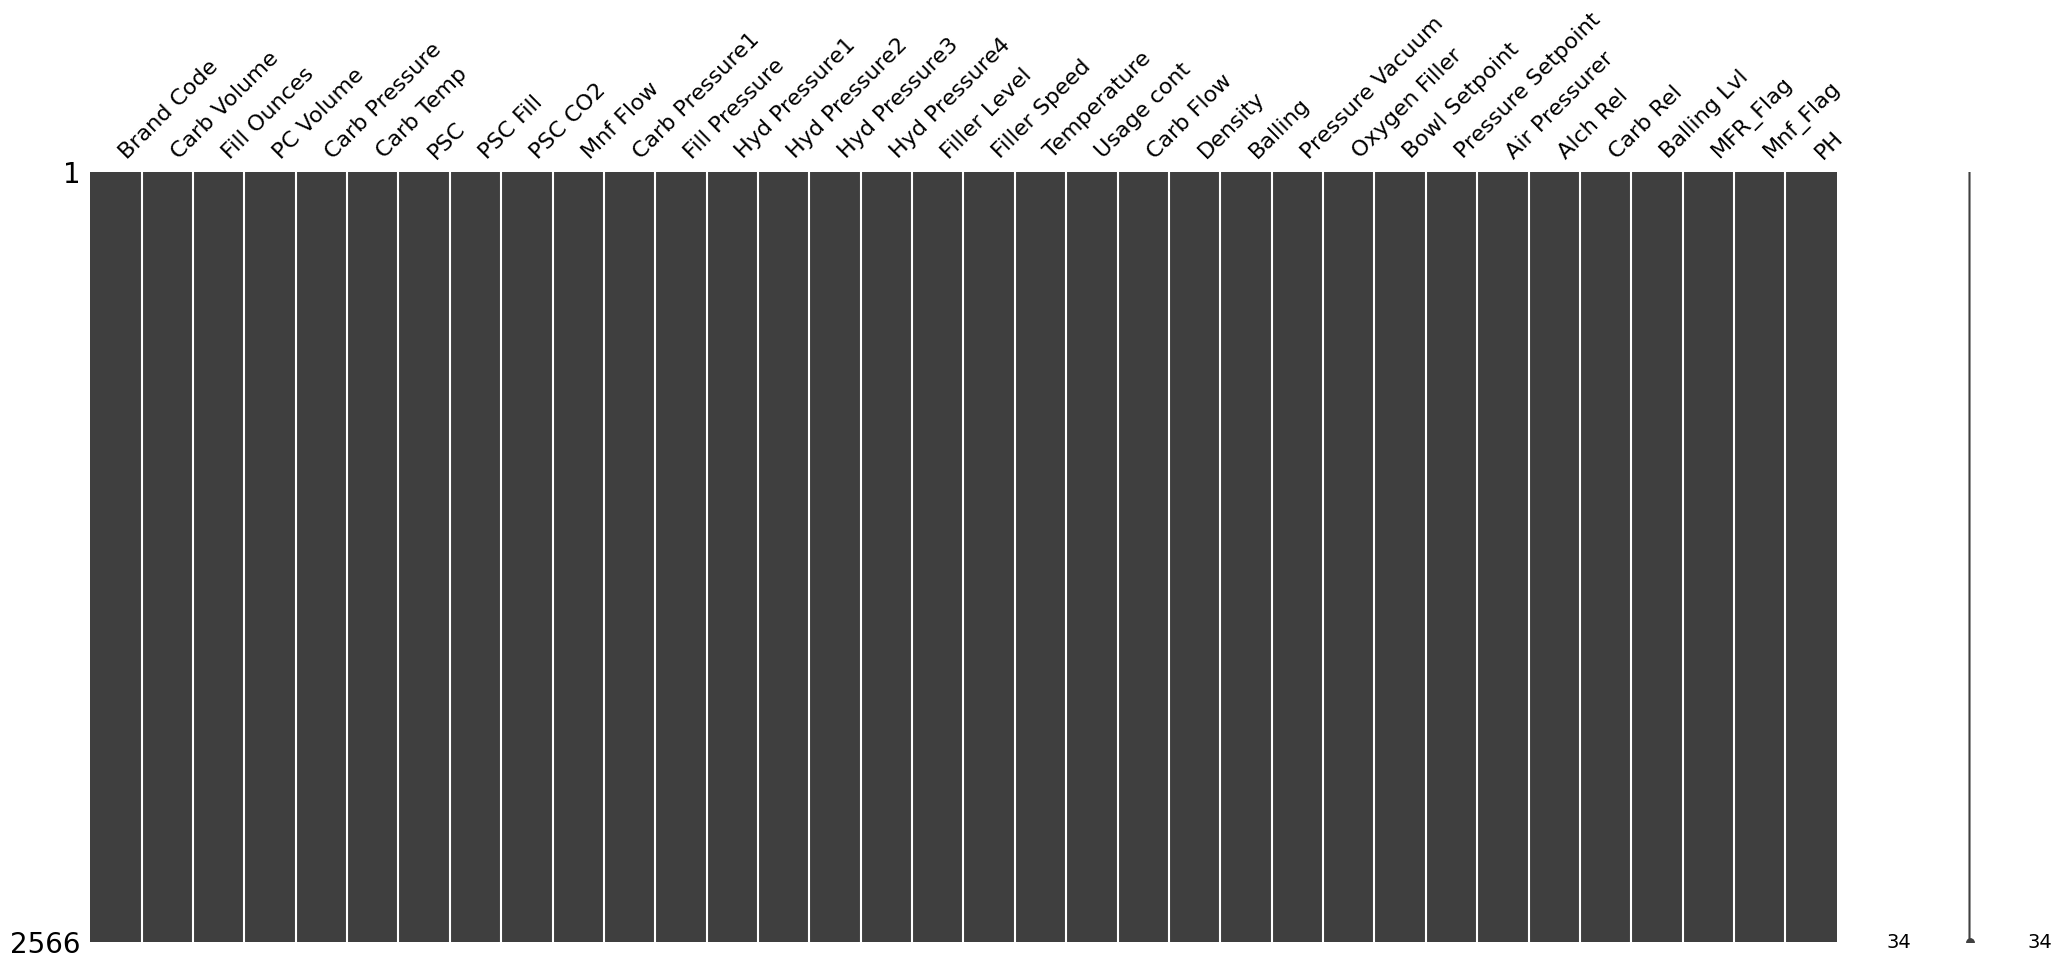

In [ ]:
msno.matrix(bev)

Before Modeling we want to look at the Correlation Matrix, We see some high correlation between certain features. We would like to remove some of these features for colinearlity if we do decide to choose a Linear regression model as our final model.

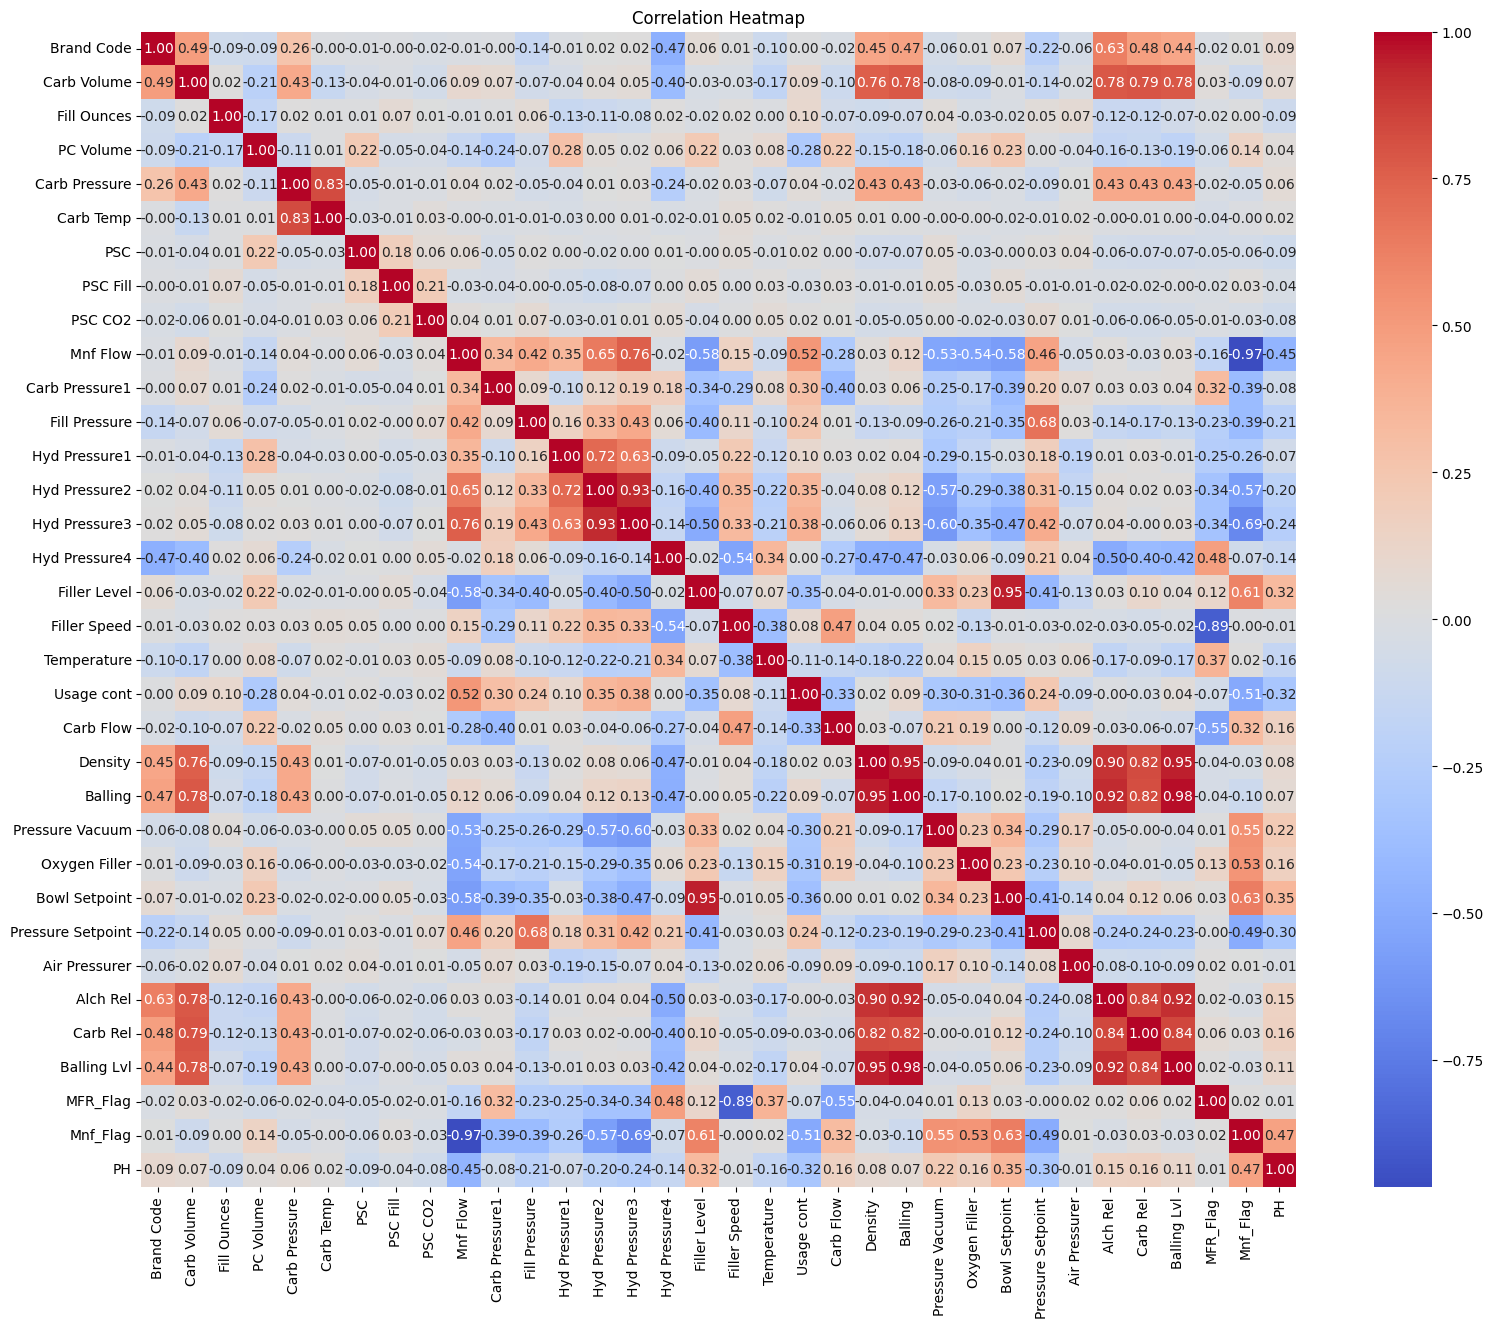

In [ ]:
# Compute the correlation matrix
correlation_matrix = bev.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


Here is a scatter plot looking at Carb Flow vs. MPH. Its interesting that their are 3 seperates clusters. I can already guess that a linear or regression model wont do great as it will collect the overall residuals. I can see random forest doing well for simlar features as it can break the data down into 3 decision points and then minimize the residuals for each of those points. Its also intersting that the poin close to 0 might be errors becasue its behaing very differently from the cluster ~ 1000 filler speed. But we will let the modeling decide and wont change the values manually.

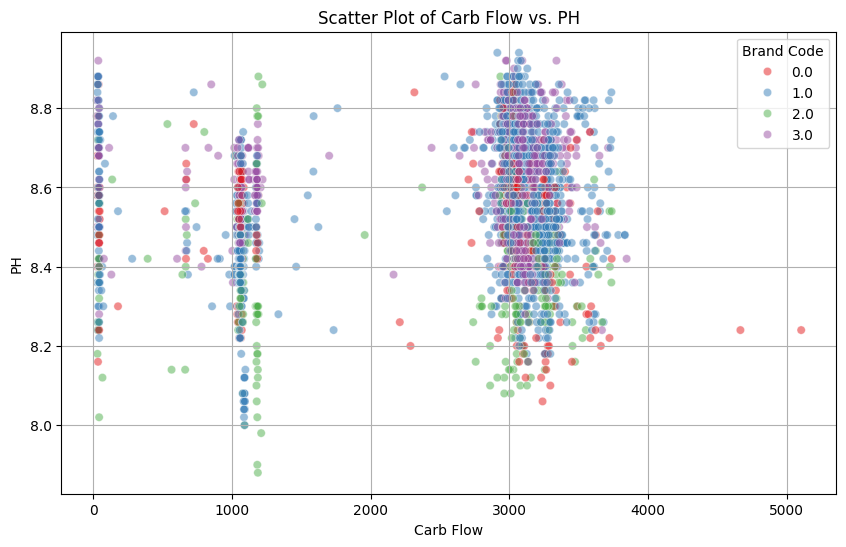

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bev, x='Carb Flow', y='PH', hue='Brand Code', palette='Set1', alpha=0.5)
plt.title('Scatter Plot of Carb Flow vs. PH')
plt.xlabel('Carb Flow')
plt.ylabel('PH')
plt.grid(True)
plt.show()


# Modeling

## No Cross Validation

### Test Train

Adding Random Seed to re create same model and setting our train test at 80/20 split

In [ ]:
# Data splitting
random_seed = 123
X = bev.drop(columns=["PH"])
y = bev["PH"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### Partial Least Square Regression

In [ ]:
PLS_model = PLSRegression(n_components=n)
PLS_model.fit(X_train, y_train)
rf_pred = PLS_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
no_cv_rmse = np.sqrt(-cross_val_score(PLS_model, X_train, y_train, scoring='neg_mean_squared_error')).mean()
no_cv_r_squared = cross_val_score(PLS_model, X_train, y_train, scoring='r2').mean()
no_cv_mae = -cross_val_score(PLS_model, X_train, y_train,  scoring='neg_mean_absolute_error').mean()


no_cv_pls_results_df = pd.DataFrame({'Model Name': ['PLS_No_CV'],
                                 'Components': ['30'],
                           'RMSE': no_cv_rmse,
                           'R_squared': no_cv_r_squared,
                           'MAE': no_cv_mae,
                           'Cross Validation': ['No CV']})

no_cv_pls_results_df


,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,PLS_No_CV,30,0.140511,0.338027,0.106972,No CV


### Random Forest

In [ ]:

rf_model = RandomForestRegressor(random_state=random_seed)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
no_cv_rmse = np.sqrt(-cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error')).mean()
no_cv_r_squared = cross_val_score(rf_model, X_train, y_train, scoring='r2').mean()
no_cv_mae = -cross_val_score(rf_model, X_train, y_train,  scoring='neg_mean_absolute_error').mean()


no_cv_rf_results_df = pd.DataFrame({'Model Name': ['Random Forest_No_CV'],
                                 'Components': ['30'],
                           'RMSE': no_cv_rmse,
                           'R_squared': no_cv_r_squared,
                           'MAE': no_cv_mae,
                           'Cross Validation': ['No CV']})

no_cv_rf_results_df


,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,Random Forest_No_CV,30,0.104851,0.631499,0.07573,No CV


### XGBoost

In [ ]:

xgb_model = xgb.XGBRegressor(random_state=random_seed)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)

no_cv_rmse = np.sqrt(-cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_squared_error')).mean()
no_cv_r_squared = cross_val_score(xgb_model, X_train, y_train, scoring='r2').mean()
no_cv_mae = -cross_val_score(xgb_model, X_train, y_train,  scoring='neg_mean_absolute_error').mean()


no_cv_xg_results_df = pd.DataFrame({'Model Name': ['XGBoost_No_CV'],
                                 'Components': ['30'],
                           'RMSE': no_cv_rmse,
                           'R_squared': no_cv_r_squared,
                           'MAE': no_cv_mae,
                           'Cross Validation': ['No CV']})

no_cv_xg_results_df



,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,XGBoost_No_CV,30,0.106164,0.622449,0.077961,No CV


## Cross Validation

We have decent results for our models. However we are clearly over fitting our models as Random Forest and XG Boost have tendency to overfit, One way to solve for overfitting is Cross Fold Validation. We will be running all existing models with Fold of 10 to help solve for overfitting problem

We are also doing basic hyper parameter tuning by checking parameters were our models are giving us the most balance and best performing results.

### PLS Regression with CV

For Partial Least Square with 10 Fold Validation and 30 components which are all the features. This is mainly because of the Cross FOld Validation as now you are tkaing the mean of your metrics across the 10 Folds random runs. However this solves for Overfitting, by allowing the model to be trained on the full data set and not just 80% of the data while giving you a more accurate mesure of your accuracy and other KPI.

 We are telling the model to give us the components and how they becahave on the overall model. Orignally, in our inital model we didnot give the Components parameter and thus the model is using all the features. However now we are mapping how each additional component effect accuracy. You would not want to use the full 30 components as that would lead to overfitting, instead we would look for an elbow in the graph and thats the number of components we should choose to represent 99% of our model.




In [ ]:
n_components_range = range(1, 31)

rmse_scores = []
r_squared_scores = []
mae_scores = []


for n in n_components_range:
    pls = PLSRegression(n_components=n)

    rmse = np.sqrt(-cross_val_score(pls, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()
    r_squared = cross_val_score(pls, X_train, y_train, cv=10, scoring='r2').mean()
    mae = -cross_val_score(pls, X_train, y_train, cv=10, scoring='neg_mean_absolute_error').mean()
    rmse_scores.append(rmse)
    r_squared_scores.append(r_squared)
    mae_scores.append(mae)

pls_results_df = pd.DataFrame({
    'Model Name': ['PLS'] * len(n_components_range),
    'Components': n_components_range,
    'RMSE': rmse_scores,
    'R_squared': r_squared_scores,
    'MAE': mae_scores,
    'Cross Validation': ['10 Folds'] * len(n_components_range)})

pls_results_df


,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,PLS,1,0.153185,0.210636,0.121679,10 Folds
1,PLS,2,0.146635,0.277543,0.114632,10 Folds
2,PLS,3,0.143879,0.304072,0.111561,10 Folds
3,PLS,4,0.142830,0.313964,0.110988,10 Folds
4,PLS,5,0.141727,0.324598,0.109081,10 Folds
5,PLS,6,0.141029,0.331034,0.108832,10 Folds
6,PLS,7,0.140609,0.335052,0.107948,10 Folds
7,PLS,8,0.140250,0.338493,0.107385,10 Folds
8,PLS,9,0.140063,0.340211,0.107120,10 Folds
9,PLS,10,0.139917,0.341584,0.106846,10 Folds


Create DataFrame to display the results

#### Plot

 As the number of components go up the accuracy become increases and our RMSE becomes lower. THe elbow is arounf the 9-10 componets mark. And that is wehere we should choose our # of components. For 10 Components our RMSE is 0.1399. Its intresting, that in the range of 13-20 omponents the RMSE score actualy goes up. Meaning that those features are causing a higher variance in our model.

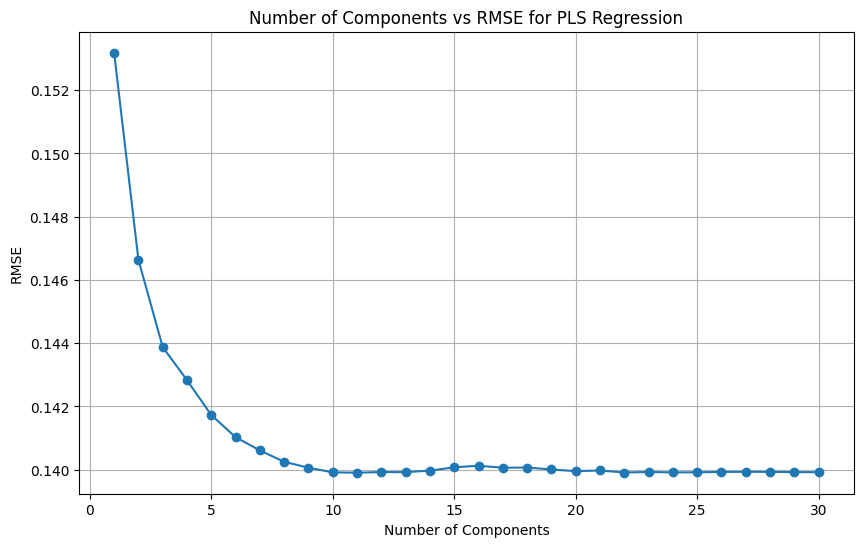

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, rmse_scores, marker='o', linestyle='-')
plt.title('Number of Components vs RMSE for PLS Regression')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()




### Random Forest with CV and Hyper Paremeter

Next we model RF with 10 Fold CV and Estimers as Hyper Paremter. We didnt want to aply other hyper paremeters as the model was taking too long and realized that n_estimators had the biggest impact on the model.

In [ ]:
n_estimators_range = [1, 2, 10, 25, 50, 100]  # Example values, you can adjust as needed

rf_rmse_scores = []
rf_r_squared_scores = []
rf_mae_scores = []

for n_estimators in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n_estimators,random_state=random_seed)
    rmse = np.sqrt(-cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()
    r_squared = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='r2').mean()
    mae = -cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error').mean()
    # Append scores to lists
    rf_rmse_scores.append(rmse)
    rf_r_squared_scores.append(r_squared)
    rf_mae_scores.append(mae)


rf_results_df = pd.DataFrame({
    'Model Name': ['Random Forest'] * len(n_estimators_range),
    'Components': n_estimators_range,
    'RMSE': rf_rmse_scores,
    'R_squared': rf_r_squared_scores,
    'MAE': rf_mae_scores,
    'Cross Validation': ['10 Folds'] * len(n_estimators_range)})

rf_results_df




,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,Random Forest,1,0.153538,0.200470,0.108539,10 Folds
1,Random Forest,2,0.129043,0.435442,0.093078,10 Folds
2,Random Forest,10,0.106002,0.621980,0.078278,10 Folds
3,Random Forest,25,0.103299,0.641087,0.074867,10 Folds
4,Random Forest,50,0.102419,0.647077,0.073929,10 Folds
5,Random Forest,100,0.102029,0.649765,0.073398,10 Folds


#### Plot

We notice that arounf the 25-50 estimator which us the number of random tress is wehre the elbow is and we can choose 50 n_estimator as our optimal model here which has an RMSE of .1024

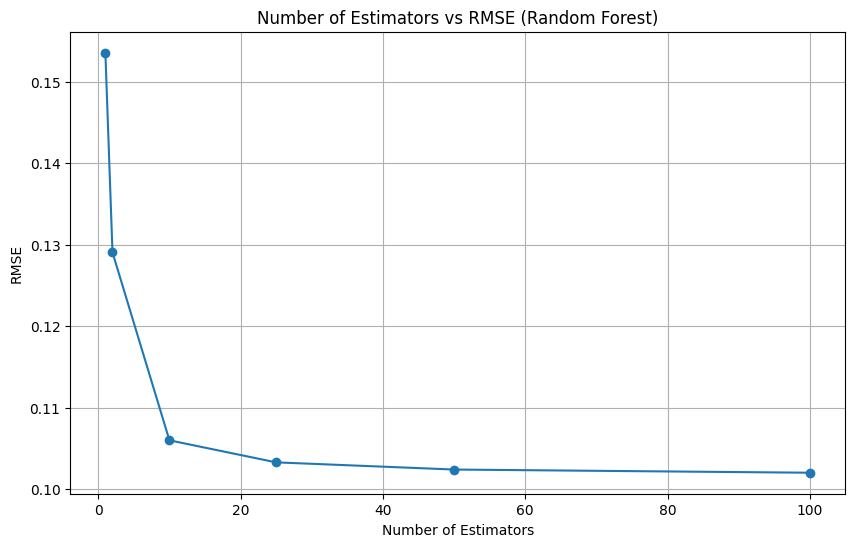

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, rf_rmse_scores, marker='o', linestyle='-')
plt.title('Number of Estimators vs RMSE (Random Forest)')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


#### Feature Importance

Wow, very intresting, my engineered feature which was the Mnf_Glag which was wheter the value is positive or negative is the most important feature accroding to the RF model.

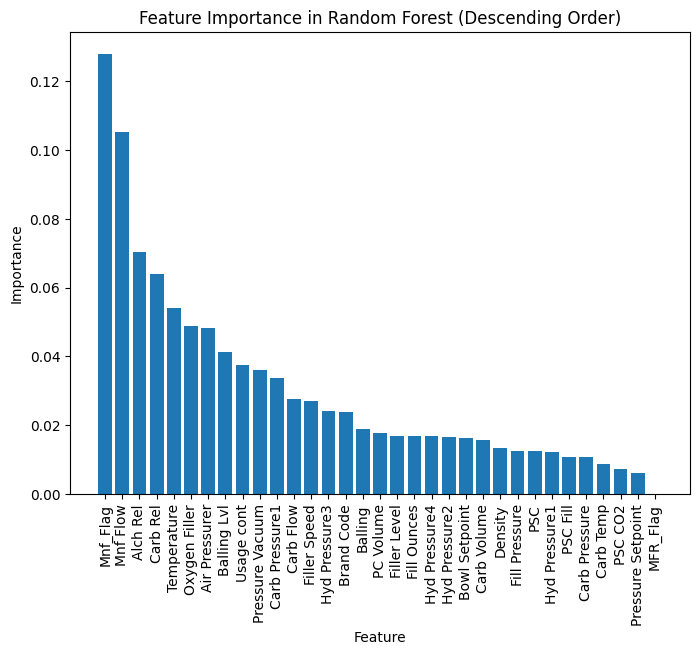

,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,Random Forest,1,0.153538,0.200470,0.108539,10 Folds
1,Random Forest,2,0.129043,0.435442,0.093078,10 Folds
2,Random Forest,10,0.106002,0.621980,0.078278,10 Folds
3,Random Forest,25,0.103299,0.641087,0.074867,10 Folds
4,Random Forest,50,0.102419,0.647077,0.073929,10 Folds
5,Random Forest,100,0.102029,0.649765,0.073398,10 Folds


In [ ]:
feature_importance = []
rf_model = RandomForestRegressor(n_estimators=50, random_state=random_seed)
rf_model.fit(X_train, y_train)
feature_importance.append(rf_model.feature_importances_)

feature_importance_df = pd.DataFrame(feature_importance, columns=X_train.columns)

# Sort feature importance values in descending order
sorted_feature_importance_df = feature_importance_df.iloc[0].sort_values(ascending=False)

# Plot sorted feature importance
plt.figure(figsize=(8, 6))
plt.bar(sorted_feature_importance_df.index, sorted_feature_importance_df.values)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest (Descending Order)')
plt.xticks(rotation=90)
plt.show()

rf_results_df


### XG Boost

For XG boost first im finding the best paremeters based on the grid search im giving, Here im giving the n_estimators, learning rate and max depth of each branch. Ideally you would give many parameters. Buthe combination can be commutaiuonally heavy, My combination is 450 Fits and it took a significant 10 min to run. Adding addition parameter would double the amount and double the time. Overall the best parameters are 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100

In [ ]:
param_grid = {
    'n_estimators': [1, 2, 10, 50, 100],
    'learning_rate': [.01, 0.1, 0.5],
    'max_depth': [5, 6,7],
}
xgb_model = XGBRegressor(random_state=random_seed)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)


Fitting 10 folds for each of 45 candidates, totalling 450 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best RMSE: 0.09874313230203965


Once i have those parameters, i input it in my n_estimaor range to show the graph of how the model behaves as N-estimators go up. Im choosing max depth of 7 and learning rate of .1

In [ ]:
n_estimators_range = [1, 2, 10, 25, 50, 100]

xgb_rmse_scores = []
xgb_r_squared_scores = []
xgb_mae_scores = []

for n_estimators in n_estimators_range:
    xgb_model = XGBRegressor(n_estimators=n_estimators, learning_rate= 0.1, max_depth= 7, random_state=random_seed)
    rmse = np.sqrt(-cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()
    r_squared = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='r2').mean()
    mae = -cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error').mean()
    # Append scores to lists
    xgb_rmse_scores.append(rmse)
    xgb_r_squared_scores.append(r_squared)
    xgb_mae_scores.append(mae)


xgb_results_df = pd.DataFrame({
    'Model Name': ['XGBoost'] * len(n_estimators_range),
    'Components': n_estimators_range,
    'RMSE': xgb_rmse_scores,
    'R_squared': xgb_r_squared_scores,
    'MAE': xgb_mae_scores,
    'Cross Validation': ['10 Folds'] * len(n_estimators_range)})

xgb_results_df




,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,XGBoost,1,0.163859,0.097950,0.131694,10 Folds
1,XGBoost,2,0.156134,0.181134,0.124920,10 Folds
2,XGBoost,10,0.121073,0.507386,0.093747,10 Folds
3,XGBoost,25,0.104348,0.633469,0.076927,10 Folds
4,XGBoost,50,0.100121,0.662443,0.072285,10 Folds
5,XGBoost,100,0.098457,0.673510,0.070579,10 Folds


### Plot

We can see XG boost behaving simlarly to Random Forest but here the elbow is arounf the 50 estimator mark.

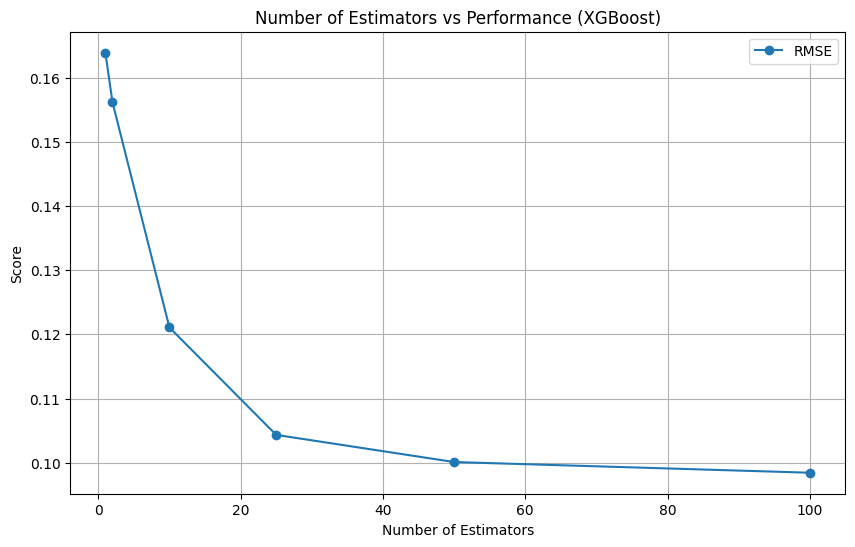

In [ ]:
# Plot Number of Estimators vs RMSE
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, xgb_rmse_scores, marker='o', linestyle='-', label='RMSE')
plt.title('Number of Estimators vs Performance (XGBoost)')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

#### Feature Importance XG Boost

Very intresting, while in Random Forest the most important feature was the engineered feature. Here in XG boost that feature has no omportance at all and instead the most important feature is Mnf Flow which was 2nd most important feature.

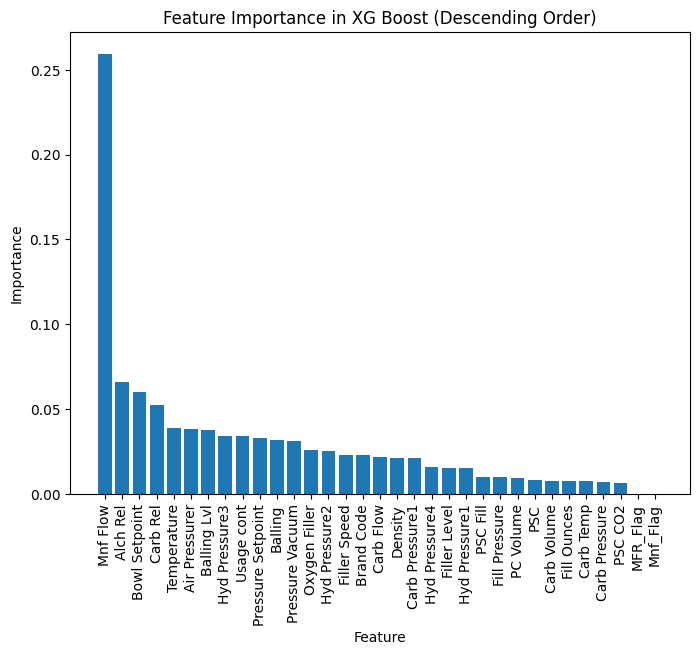

,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,Random Forest,1,0.153538,0.200470,0.108539,10 Folds
1,Random Forest,2,0.129043,0.435442,0.093078,10 Folds
2,Random Forest,10,0.106002,0.621980,0.078278,10 Folds
3,Random Forest,25,0.103299,0.641087,0.074867,10 Folds
4,Random Forest,50,0.102419,0.647077,0.073929,10 Folds
5,Random Forest,100,0.102029,0.649765,0.073398,10 Folds


In [ ]:
feature_importance = []
xgb_model = XGBRegressor(n_estimators=50, learning_rate= 0.1, max_depth= 7, random_state=random_seed)
xgb_model.fit(X_train, y_train)
feature_importance.append(xgb_model.feature_importances_)

feature_importance_df = pd.DataFrame(feature_importance, columns=X_train.columns)

# Sort feature importance values in descending order
sorted_feature_importance_df = feature_importance_df.iloc[0].sort_values(ascending=False)

# Plot sorted feature importance
plt.figure(figsize=(8, 6))
plt.bar(sorted_feature_importance_df.index, sorted_feature_importance_df.values)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in XG Boost (Descending Order)')
plt.xticks(rotation=90)
plt.show()

rf_results_df


## Best Model

### All Models

Here we are concating all the models so we can have a clear view of which models are the best mdoel to predict out PH. We are choosing the 3 models with out the Cross Validation and Hyper Parameter Tuning plus th 3 models with CV and HPT.

In [ ]:
# Concatenate all DataFrames
final_results_df = pd.concat([no_cv_pls_results_df,no_cv_rf_results_df,no_cv_xg_results_df,pls_results_df,rf_results_df,xgb_results_df], ignore_index=True)
final_results_df


,Model Name,Components,RMSE,R_squared,MAE,Cross Validation
0,PLS_No_CV,30,0.140511,0.338027,0.106972,No CV
1,Random Forest_No_CV,30,0.104851,0.631499,0.075730,No CV
2,XGBoost_No_CV,30,0.106164,0.622449,0.077961,No CV
3,PLS,1,0.153185,0.210636,0.121679,10 Folds
4,PLS,2,0.146635,0.277543,0.114632,10 Folds
5,PLS,3,0.143879,0.304072,0.111561,10 Folds
6,PLS,4,0.142830,0.313964,0.110988,10 Folds
7,PLS,5,0.141727,0.324598,0.109081,10 Folds
8,PLS,6,0.141029,0.331034,0.108832,10 Folds
9,PLS,7,0.140609,0.335052,0.107948,10 Folds


### Ploting All the Models

Comparing all the metrics we can see that XG Boost is the best model overall with 100 estimator run with RMSE of .0984. This is due to the fact that XG boost is a fast model which allows for many options in Hyper Parameter Tuning. Its intresting that until the 35 Estimator, Random Forest is a better model in terms of RMSE however XG boost overtakes it after that mark. This is why its very important to Hyper Parametizer your model as it behave differently as you increase the number of iteration and Hyper Paremters. Overall XG boost is a famaous algorithim among the communtiy and is my personal go to and it dinot dissapoint at all.

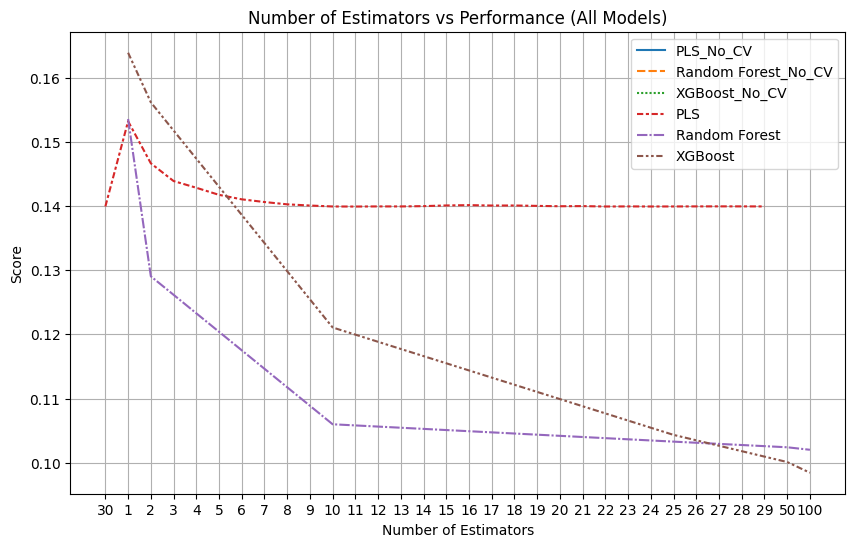

In [ ]:
# Plot Number of Estimators vs RMSE
final_results_df['Components'] = final_results_df['Components'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_results_df, x='Components', y='RMSE', hue='Model Name', style='Model Name')
plt.title('Number of Components vs RMSE')
plt.title('Number of Estimators vs Performance (All Models)')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

## Predicting PH on Evaluation Set

In [ ]:
# Assuming 'bev_eval' contains only features
X_eval = bev_eval  # Features for evaluation

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate= 0.1, max_depth= 7, random_state=random_seed)
xgb_model.fit(X_train, y_train)
X_eval.drop(columns=["MFR"], inplace=True)
# Make predictions on evaluation data
predictions = xgb_model.predict(X_eval)

# Add predictions to bev_eval DataFrame
X_eval['PH_Prediction'] = predictions

# Now bev_eval DataFrame contains predictions in 'PH_Prediction' column
X_eval

,Brand Code,Carb Volume,Fill Ounces,PC Volume,Carb Pressure,Carb Temp,PSC,PSC Fill,PSC CO2,Mnf Flow,Carb Pressure1,Fill Pressure,Hyd Pressure1,Hyd Pressure2,Hyd Pressure3,Hyd Pressure4,Filler Level,Filler Speed,Temperature,Usage cont,Carb Flow,Density,Balling,Pressure Vacuum,Oxygen Filler,Bowl Setpoint,Pressure Setpoint,Air Pressurer,Alch Rel,Carb Rel,Balling Lvl,MFR_Flag,Mnf_Flag,PH_Prediction
0,3.0,5.480000,24.033333,0.270000,65.4,134.6,0.236,0.40,0.04,-100.0,116.6,46.0,0.0,2.649607,1.374942,96.0,129.4,3986.000000,66.0,21.66,2950.0,0.88,1.398,-3.8,0.022000,130.0,45.2,142.6,6.56,5.34,1.48,0.0,1.0,8.479150
1,0.0,5.393333,23.953333,0.226667,63.2,135.0,0.042,0.22,0.08,-100.0,118.8,46.2,0.0,0.000000,0.000000,112.0,120.0,4012.000000,65.6,17.60,2916.0,1.50,2.942,-4.4,0.030000,120.0,46.0,147.2,7.14,5.58,3.04,0.0,1.0,8.331419
2,1.0,5.293333,23.920000,0.303333,66.4,140.4,0.068,0.10,0.02,-100.0,120.2,45.8,0.0,0.000000,0.000000,98.0,119.4,4010.000000,65.6,24.18,3056.0,0.90,1.448,-4.2,0.046000,120.0,46.0,146.6,6.52,5.34,1.46,0.0,1.0,8.477171
3,1.0,5.266667,23.940000,0.186000,64.8,139.0,0.004,0.20,0.02,-100.0,124.8,40.0,0.0,0.000000,0.000000,132.0,120.2,1835.742211,74.4,18.12,28.0,0.74,1.056,-4.0,0.065154,120.0,46.0,146.4,6.48,5.50,1.48,1.0,1.0,8.519731
4,1.0,5.406667,24.200000,0.160000,69.4,142.2,0.040,0.30,0.06,-100.0,115.0,51.4,0.0,0.000000,0.000000,94.0,116.0,4018.000000,66.4,21.32,3214.0,0.88,1.398,-4.0,0.082000,120.0,50.0,145.8,6.50,5.38,1.46,0.0,1.0,8.412593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1.0,5.386667,24.040000,0.222667,66.4,138.2,0.096,0.20,0.04,133.4,122.8,54.8,10.2,21.400000,27.800000,104.0,105.8,2766.000000,65.0,23.94,1188.0,0.46,1.566,-5.8,0.003800,110.0,50.0,142.4,6.60,5.38,1.46,0.0,0.0,8.495780
263,3.0,5.573333,24.086667,0.234000,62.8,130.0,0.054,0.06,0.02,177.2,123.6,47.8,20.4,34.800000,38.000000,78.0,110.6,4008.000000,63.8,24.32,1184.0,1.34,3.764,-5.6,0.002400,110.0,48.0,142.6,7.74,5.62,3.36,0.0,0.0,8.598899
264,2.0,5.420000,24.026667,0.272667,62.6,132.6,0.128,0.14,0.04,174.8,124.2,54.6,20.0,33.000000,40.600000,124.0,111.2,3992.000000,64.4,23.72,1180.0,0.60,1.918,-6.2,0.006800,110.0,50.0,142.0,6.52,5.36,1.62,0.0,0.0,8.339891
265,2.0,5.253333,24.093333,0.360667,68.2,144.6,0.060,0.14,0.08,143.8,121.8,49.6,14.0,25.600000,34.000000,106.0,109.4,3992.000000,65.0,23.58,1180.0,0.60,1.918,-6.0,0.002600,110.0,50.0,142.2,6.50,5.24,1.62,0.0,0.0,8.299331


### Exporting to Excel File

In [ ]:
X_eval.to_excel("PHpredictions.xlsx", index=False)

In summary, XG Boost emerges as the top-performing model in our analysis, exhibiting lower RMSE with 50 estimators compared to Random Forest. Although Random Forest performs admirably, it demonstrates superiority only until around 35 estimators. Initially the RF model performed better the XG boost when no CV or Cross Validation applied but after CV and Hyper Parameter Tuning XG Boost is the winning model.


Throughout the data cleansing and modeling phases, Random Forest and XG Boost emerged as robust options for predicting PH values on the test set. I was shocked to find out the enineered feature Mnf_Flow was the most important feature in the model.  This suggests that the PH values may be influenced by the measurement of MnF Flow and whether its a negative or postive and not just the value.


Also the importance of Cross Validation in Decsion Tree models which tend to over fit was shown as well.

Ultimatly XG boost didnot dissapoint and emerged as the preferred choice due to its strong performance on the testing data and favorable R-squared and RMSE metrics.



